In [25]:
%matplotlib inline
import requests
import pandas
import matplotlib.dates as mdates

In [26]:
def plot_multi(data, cols=None, spacing=.1, **kwargs):

    from pandas import plotting

    # Get default color style from pandas - can be changed to any other color list
    if cols is None: cols = data.columns
    if len(cols) == 0: return
    colors = getattr(getattr(plotting, '_style'), '_get_standard_colors')(num_colors=len(cols))

    # First axis
    ax = data.loc[:, cols[0]].plot(label=cols[0], color=colors[0])
    ax.set_ylabel(ylabel=cols[0])
    lines, labels = ax.get_legend_handles_labels()

    for n in range(1, len(cols)):
        # Multiple y-axes
        ax_new = ax.twinx()
        ax_new.spines['right'].set_position(('axes', 1 + spacing * (n - 1)))
        data.loc[:, cols[n]].plot(ax=ax_new, label=cols[n], color=colors[n % len(colors)], **kwargs)
        ax_new.set_ylabel(ylabel=cols[n])

        # Proper legend position
        line, label = ax_new.get_legend_handles_labels()
        lines += line
        labels += label

    ax.legend(lines, labels, loc=0)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
    return ax

In [27]:
def parse_finam_data(path):
    data = pandas.read_csv(path, dtype={'<DATE>': str, '<TIME>': str})
    data.columns = [c.replace('<','').replace('>','') for c in data.columns]
    data['DATETIME'] = pandas.to_datetime(data.DATE + data.TIME, format='%Y%m%d%H%M%S')
    data.drop('TICKER', axis=1, inplace=True)
    return data

In [28]:
fut = parse_finam_data('data\SPFB.VTBR-3.19_181220_181220.txt')
spot = parse_finam_data('data\VTBR_181220_181220.txt')

In [45]:
merged = pandas.merge(fut.set_index('DATETIME')[['CLOSE']],
                      spot.set_index('DATETIME')[['CLOSE']],
                      on='DATETIME',
                      how='left',
                      suffixes=('_fut', '_spot'))
merged.fillna(method='ffill', inplace=True)
merged['CLOSE_spot'] = merged['CLOSE_spot']*100000

In [46]:
for_plot = merged
for_plot['DIFF'] = (for_plot['CLOSE_fut']-for_plot['CLOSE_spot'])

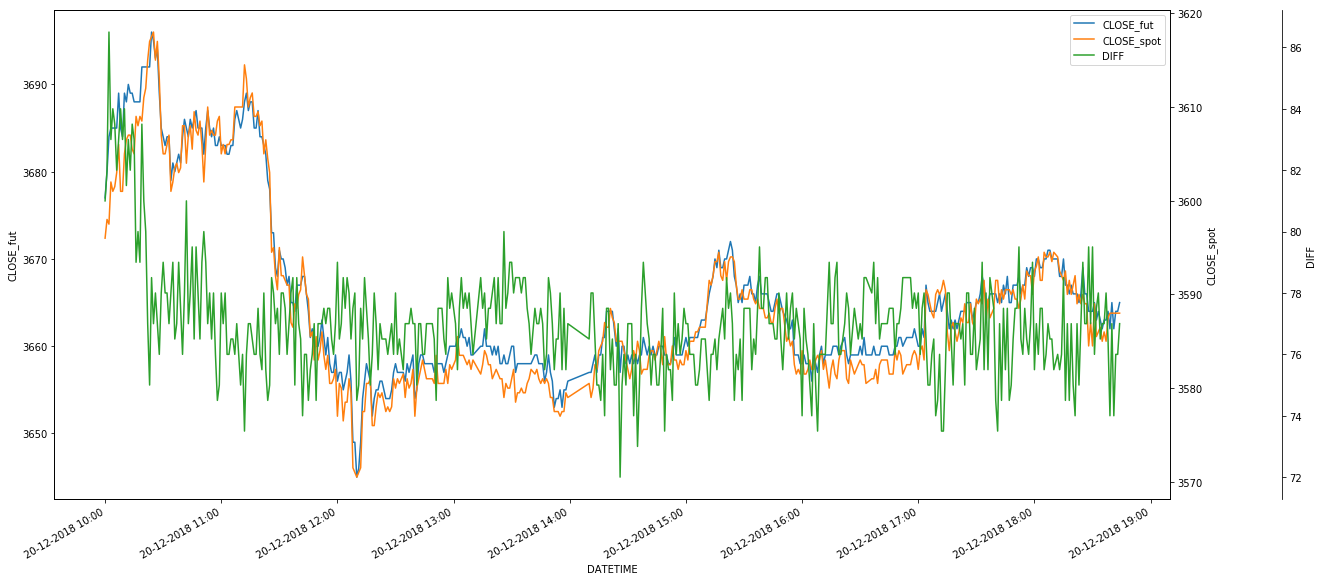

In [47]:
plot_multi(for_plot, figsize=(20,10))

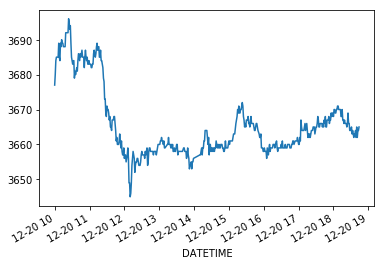

In [48]:
for_plot.CLOSE_fut.plot()